In [34]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.model_selection import KFold,train_test_split,cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [35]:
zoo = pd.read_csv("Zoo.csv")

In [36]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [37]:
zoo1 = zoo.drop(["animal name","airborne","predator","fins"],axis=1)

In [38]:
zoo1

,hair,feathers,eggs,milk,aquatic,toothed,backbone,breathes,venomous,legs,tail,domestic,catsize,type
0,1,0,0,1,0,1,1,1,0,4,0,0,1,1
1,1,0,0,1,0,1,1,1,0,4,1,0,1,1
2,0,0,1,0,1,1,1,0,0,0,1,0,0,4
3,1,0,0,1,0,1,1,1,0,4,0,0,1,1
4,1,0,0,1,0,1,1,1,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,1,1,1,0,2,1,0,1,1
97,1,0,1,0,0,0,0,1,1,6,0,0,0,6
98,1,0,0,1,0,1,1,1,0,4,1,0,1,1
99,0,0,1,0,0,0,0,1,0,0,0,0,0,7


In [39]:
zoo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   aquatic   101 non-null    int64
 5   toothed   101 non-null    int64
 6   backbone  101 non-null    int64
 7   breathes  101 non-null    int64
 8   venomous  101 non-null    int64
 9   legs      101 non-null    int64
 10  tail      101 non-null    int64
 11  domestic  101 non-null    int64
 12  catsize   101 non-null    int64
 13  type      101 non-null    int64
dtypes: int64(14)
memory usage: 11.2 KB


In [40]:
zoo1.corr()

,hair,feathers,eggs,milk,aquatic,toothed,backbone,breathes,venomous,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.473554,0.492531,0.191681,0.441149,-0.104245,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,-0.058552,-0.613631,0.231403,0.254588,-0.145739,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376244,-0.642150,-0.340420,-0.382777,0.098689,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.362613,0.628168,0.384958,0.423527,-0.242449,0.214196,0.210026,0.163928,0.574906,-0.723683
aquatic,-0.473554,-0.058552,0.376244,-0.362613,1.000000,0.053150,0.022463,-0.637506,0.087915,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
toothed,0.492531,-0.613631,-0.642150,0.628168,0.053150,1.000000,0.575085,-0.065690,-0.062344,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,0.022463,0.575085,1.000000,0.207666,-0.246611,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,-0.637506,-0.065690,0.207666,1.000000,-0.120752,0.369868,0.088952,0.124068,0.204125,-0.519308
venomous,-0.104245,-0.145739,0.098689,-0.242449,0.087915,-0.062344,-0.246611,-0.120752,1.000000,0.022964,-0.162724,-0.003252,-0.183748,0.321476
legs,0.394009,-0.206686,-0.224918,0.214196,-0.360638,-0.193476,-0.432856,0.369868,0.022964,1.000000,-0.348295,0.073931,0.068791,0.131693


#airborne,predator,fins this three columns are less corelated with the Type 
and drop that columns

# Data Understanding 

In [42]:
zoo1.shape

(101, 14)

# model Building

In [46]:
X = zoo1.drop("type",axis=1)
X 

,hair,feathers,eggs,milk,aquatic,toothed,backbone,breathes,venomous,legs,tail,domestic,catsize
0,1,0,0,1,0,1,1,1,0,4,0,0,1
1,1,0,0,1,0,1,1,1,0,4,1,0,1
2,0,0,1,0,1,1,1,0,0,0,1,0,0
3,1,0,0,1,0,1,1,1,0,4,0,0,1
4,1,0,0,1,0,1,1,1,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,1,1,1,0,2,1,0,1
97,1,0,1,0,0,0,0,1,1,6,0,0,0
98,1,0,0,1,0,1,1,1,0,4,1,0,1
99,0,0,1,0,0,0,0,1,0,0,0,0,0


In [48]:
y = zoo1[["type"]]
y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True)

In [55]:
X_train.shape , y_train.shape

((80, 13), (80, 1))

In [56]:
X_test.shape , y_test.shape

((21, 13), (21, 1))

# 5.Model testing

# Standardize the data

In [60]:
from sklearn.preprocessing import StandardScaler
std_scalar = StandardScaler()
scaled_X = std_scalar.fit_transform(X)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,shuffle=True)

In [62]:
#for k= 3
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9047619047619048

In [63]:
#for k= 7
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8095238095238095

# how to choose the optimal value of k?

In [71]:
cv_score = []
for i in range (1,20,1):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    kfold = KFold(n_splits=5,shuffle=True,random_state=10)
    cross_validation_score = cross_val_score(estimator=knn_model,X=scaled_X,y=y,cv=kfold)
    cv_score.append(cross_validation_score.mean().round(5))
    
    

In [66]:
cv_score

[0.95095,
 0.95095,
 0.96048,
 0.92095,
 0.92095,
 0.92095,
 0.92095,
 0.87143,
 0.8419,
 0.82238,
 0.81238,
 0.82238,
 0.82143,
 0.82143,
 0.81143,
 0.80143,
 0.81143,
 0.81143,
 0.81143]

In [72]:
max(cv_score)

0.96048

In [73]:
from matplotlib import pyplot as plt


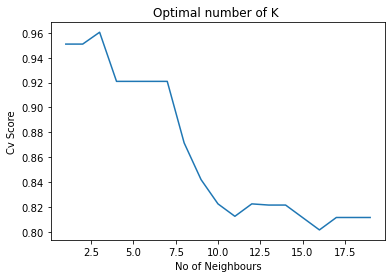

In [74]:
plt.plot(range(1,20,1),cv_score)
plt.xlbael("No of Neighbours")
plt.ylabel("Cv Score")
plt.title("Optimal number of K ")
plt.show()

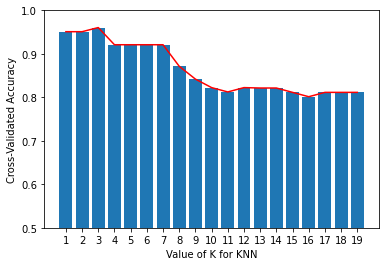

In [76]:
import matplotlib.pyplot as plt 

# plot to see clearly
plt.bar(range(1,20,1), cv_score),
plt.plot(range(1,20,1), cv_score,color="red")


#plt.figure(figsize=(15,7))
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(range(1,20,1))
plt.ylim(0.5,1)
plt.show()

#from the above graph we got to know that the optimal number of k value is 3